#About this notebook...

Documention prepared by **Jesus Perez Colino**.
Version 0.2, Released 25/11/2013, Alpha

- This work is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). This work is offered for free, with the hope that it will be useful.

- **Acknowledge**: To create the current documentation I have inserted many examples from many people and many places. Specially thanks to **Chris Beaumont** from Harvard University for some of the best examples, **Matthew A. Russell**'s book on *'Mining the Social Web'* (O'Reilly 2013) and, of course, big thanks to **Wes McKinney** who develop **pandas** and leave it for everybody for free. 


**Testing Python & packages versions: **

In [1]:
%matplotlib inline
import os
import math
import IPython
import html5lib
import time as t
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
from matplotlib import rcParams
#tell pandas to display wide tables as pretty HTML tables
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)



#colorbrewer2 Dark2 qualitative color table
dark2_colors = [
(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
(0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
(0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
(0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
(0.4, 0.6509803921568628, 0.11764705882352941),
(0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
(0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, 
                  right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out 
    unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle 
    whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        

from sys import version

print '='*65
print 'Python version:     ' + version
print 'Numpy version:      ' + np.__version__
print 'Pandas version:     ' + pd.__version__
print 'Matplotlib ver:     ' + mpl.__version__
print 'IPython version:    ' + IPython.__version__
direct = %pwd
print 'Working directory:  ' + direct
print '='*65
now = t.asctime()
print 'Today is ' + now + ' ... AND WE ARE READY TO GO!! '
print '='*65

Python version:     2.7.9 |Anaconda 2.2.0 (x86_64)| (default, Dec 15 2014, 10:37:34) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Numpy version:      1.9.2
Pandas version:     0.16.0
Matplotlib ver:     1.4.3
IPython version:    3.0.0
Working directory:  /Users/JPC/Ipython NoteBooks
Today is Thu Apr 16 09:30:20 2015 ... AND WE ARE READY TO GO!! 


#**Data Scraping**: HTML, WebAPI, Clipboard, SQLite...

**Data Scraping** is an automated process that retrieve and download pages, grab the content and store it in databases or text files.
There is several methods in Python to do DataScraping: **urlparse** (to manipulate url-strings), **urllib** (to download data through different protocols like http, ftp...), **BeautifulSoup** (html/xml parser), **lxml** (library for processing XML and HTML), **twill**, **Selenium**... and of course, some of them are included in pandas.

The Pandas I/O api is a set of top level reader functions accessed like pd.read_csv() that generally return a pandas object.

* read_csv
* read_excel
* read_hdf
* read_sql
* read_json
* read_html
* read_stata
* read_clipboard
* read_pickle

The corresponding writer functions are object methods that are accessed like df.to_csv()

* to_csv
* to_excel
* to_hdf
* to_sql
* to_json
* to_html
* to_stata
* to_clipboard
* to_pickle





##Scraping from Web-HTML

In [2]:
# Just in case you do not have intalled: run directly 
# !pip install html5lib

url = 'http://www.fdic.gov/bank/individual/failed/banklist.html'
dfs = pd.read_html(url)
df = dfs[0]
print dfs


[                                             Bank Name             City  ST   CERT                      Acquiring Institution        Closing Date        Updated Date Loss Share Type Agreement Terminated Termination Date
0                                 Doral BankEn Espanol         San Juan  PR  32102               Banco Popular de Puerto Rico   February 27, 2015       April 8, 2015             NaN                  NaN              NaN
1                    Capitol City Bank & Trust Company          Atlanta  GA  33938        First-Citizens Bank & Trust Company   February 13, 2015       April 8, 2015            none                  NaN              NaN
2                              Highland Community Bank          Chicago  IL  20290                  United Fidelity Bank, fsb    January 23, 2015      March 26, 2015            none                  NaN              NaN
3                     First National Bank of Crestview        Crestview  FL  17557                             First NB

In [3]:
df.head()


,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,Loss Share Type,Agreement Terminated,Termination Date
0,Doral BankEn Espanol,San Juan,PR,32102,Banco Popular de Puerto Rico,"February 27, 2015","April 8, 2015",NaN,NaN,NaN
1,Capitol City Bank & Trust Company,Atlanta,GA,33938,First-Citizens Bank & Trust Company,"February 13, 2015","April 8, 2015",none,NaN,NaN
2,Highland Community Bank,Chicago,IL,20290,"United Fidelity Bank, fsb","January 23, 2015","March 26, 2015",none,NaN,NaN
3,First National Bank of Crestview,Crestview,FL,17557,First NBC Bank,"January 16, 2015","March 26, 2015",none,NaN,NaN
4,Northern Star Bank,Mankato,MN,34983,BankVista,"December 19, 2014","March 26, 2015",none,NaN,NaN


On the other hand, [Beautiful Soup](http://www.crummy.com/software/BeautifulSoup/bs4/doc/) is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.

In [16]:
# Installing the package BeautifulSoup
! pip install BeautifulSoup

Cleaning up...
Downloading/unpacking pattern
  Cannot fetch index base URL https://pypi.python.org/simple/
  Could not find any downloads that satisfy the requirement pattern
Cleaning up...
No distributions at all found for pattern
Storing complete log in C:\Users\Suso\pip\pip.log


In [134]:
import requests
from bs4 import BeautifulSoup

In [135]:
url = 'http://www.imdb.com/search/\
    title?sort=num_votes,desc&start=1&\
    title_type=feature&year=1950,2012'
r = requests.get(url)
print r.url

http://www.imdb.com/search/title?sort=num_votes,desc&start=1&title_type=feature&year=1950,2012


In [136]:
bs = BeautifulSoup(r.text)
for movie in bs.findAll('td', 'title'):
    title = movie.find('a').contents[0]
    genres = movie.find('span', 'genre').findAll('a')
    genres = [g.contents[0] for g in genres]
    runtime = movie.find('span', 'runtime').contents[0]
    rating = movie.find('span', 'value').contents[0]
    print title, genres, runtime, rating
    
    

The Shawshank Redemption [u'Crime', u'Drama'] 142 mins. 9.3
The Dark Knight [u'Action', u'Crime', u'Drama', u'Thriller'] 152 mins. 9.0
Inception [u'Action', u'Adventure', u'Mystery', u'Sci-Fi', u'Thriller'] 148 mins. 8.8
Pulp Fiction [u'Crime', u'Drama', u'Thriller'] 154 mins. 9.0
Fight Club [u'Drama'] 139 mins. 8.8
The Lord of the Rings: The Fellowship of the Ring [u'Action', u'Adventure', u'Fantasy'] 178 mins. 8.8
The Matrix [u'Action', u'Adventure', u'Sci-Fi'] 136 mins. 8.7
The Lord of the Rings: The Return of the King [u'Action', u'Adventure', u'Fantasy'] 201 mins. 8.9
The Godfather [u'Crime', u'Drama'] 175 mins. 9.2
Forrest Gump [u'Drama', u'Romance'] 142 mins. 8.7
The Lord of the Rings: The Two Towers [u'Action', u'Adventure', u'Fantasy'] 179 mins. 8.7
The Dark Knight Rises [u'Action', u'Crime', u'Thriller'] 165 mins. 8.6
Se7en [u'Crime', u'Mystery', u'Thriller'] 127 mins. 8.7
Avatar [u'Action', u'Adventure', u'Fantasy', u'Sci-Fi'] 162 mins. 7.9
Batman Begins [u'Action', u'Advent

Another typical example is how to retrive **Time Series** of market prices from web pages. Market prices can be retrived for free from **Yahoo Finance**, **Google Finance** or **Quandl.com**. Here you have an example.


In [4]:
import pandas.io.data as web

# We can retrive data from internet one-by-one:
# aapl = web.get_data_yahoo('AAPL', '2010-01-01')['Adj Close']
# msft = web.get_data_yahoo('MSFT', '2010-01-01')['Adj Close']

# or we can retrive the whole list
names = ['AAPL', 'GOOG', 'MSFT', 'DELL', 'GS', 'MS', 'BAC', 'C']

def get_prices(stock, start, end):
    return web.get_data_yahoo(stock, start, end)['Adj Close']

px = pd.DataFrame({n: get_prices(n, '2010-01-01', now) 
                   for n in names}).dropna()                 



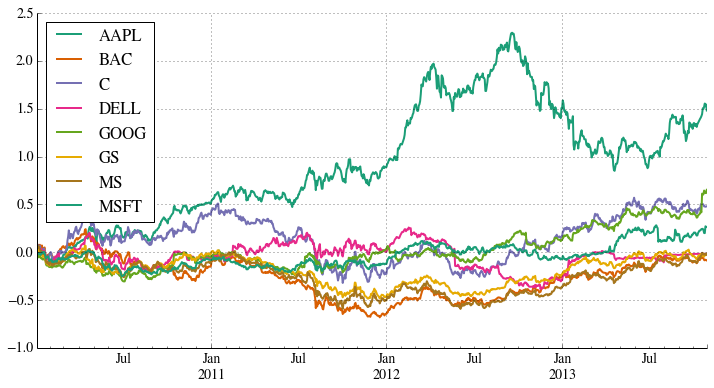

In [5]:
px = px.asfreq('B').fillna(method='pad')
rets = px.pct_change()
cum_rets = ((1+rets).cumprod()-1).dropna()
cum_rets.plot(figsize=(12,6))
remove_border()

In [6]:
cum_rets.head()

,AAPL,BAC,C,DELL,GOOG,GS,MS,MSFT
2010-01-05,0.001740,0.032362,0.038348,0.022033,-0.004404,0.017685,0.036589,0.000359
2010-01-06,-0.014208,0.044660,0.070501,0.002132,-0.029501,0.006867,0.050017,-0.005739
2010-01-07,-0.016044,0.078964,0.073451,0.012082,-0.052094,0.026557,0.065123,-0.016141
2010-01-08,-0.009472,0.069256,0.055752,0.021322,-0.039458,0.007110,0.043639,-0.009326
2010-01-11,-0.018219,0.078964,0.067552,0.021322,-0.040909,-0.008751,0.036589,-0.021879


##Scrapping using a Web API: The Twitter Example

Many web APIs will return a JSON string that must be loaded into a Python object. Here we will use the Twitter API as example, following the example in the Chapter 1 of <a href="http://bit.ly/135dHfs" target="_blank">Mining the Social Web (2nd Edition)</a>.

Twitter might be described as a real-time, highly social microblogging service that allows users to post short status updates, called <span class="emphasis"><em>tweets</em></span>, that appear on timelines. Twitter has a simple <a class="ulink" href="https://en.wikipedia.org/wiki/Representational_state_transfer" target="\_top">RESTful</a> API that is intuitive and easy to use. Even so, there are great libraries available to further mitigate the work involved in making API requests. A particularly Python package that wraps the Twitter API and mimics the public API semantics almost one-to-one is <code class="literal">twitter</code>. Like most other Python packages, you can install it with <code class="literal">pip</code> by typing <strong class="userinput"><code>pip install twitter</code></strong> in a terminal.

In [12]:
# Installing the Twitter package using pip
! pip install twitter

Downloading/unpacking twitter
  Running setup.py egg_info for package twitter
    
  Running setup.py install for twitter
    
    Installing twitter-log-script.py script to C:\Anaconda\Scripts
    Installing twitter-log.exe script to C:\Anaconda\Scripts
    Installing twitter-log.exe.manifest script to C:\Anaconda\Scripts
    Installing twitter-script.py script to C:\Anaconda\Scripts
    Installing twitter.exe script to C:\Anaconda\Scripts
    Installing twitter.exe.manifest script to C:\Anaconda\Scripts
    Installing twitterbot-script.py script to C:\Anaconda\Scripts
    Installing twitterbot.exe script to C:\Anaconda\Scripts
    Installing twitterbot.exe.manifest script to C:\Anaconda\Scripts
    Installing twitter-follow-script.py script to C:\Anaconda\Scripts
    Installing twitter-follow.exe script to C:\Anaconda\Scripts
    Installing twitter-follow.exe.manifest script to C:\Anaconda\Scripts
    Installing twitter-stream-example-script.py script to C:\Anaconda\Scripts
    Insta

In [2]:
import twitter

'''
XXX: Go to http://dev.twitter.com/apps/new 
    to create an app and get values
    for these credentials, which you'll need
    to provide in place of these
XXX string values that are defined as placeholders.
    See https://dev.twitter.com/docs/auth/oauth 
    for more information 
    on Twitter's OAuth implementation.
'''

CONSUMER_KEY = 'XXX'
CONSUMER_SECRET = 'XXX'
OAUTH_TOKEN = 'XXX'
OAUTH_TOKEN_SECRET = 'XXX'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api 
# except that it's now a defined variable

print twitter_api

###Example 1: Exploring Trends
With an authorized API connection in place, you can now issue a request. Here we show how to ask Twitter for the topics that are currently trending worldwide, but keep in mind that the API can easily be parameterized to constrain the topics to more specific locales if you feel inclined to try out some of the possibilities. The device for constraining queries is via Yahoo! GeoPlanet’s Where On Earth (WOE) ID system, which is an API unto itself that aims to provide a way to map a unique identifier to any named place on Earth (or theoretically, even in a virtual world). Here we collects a set of trends for both the entire world and just the United States.

In [3]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

print world_trends
print
print us_trends

[{u'created_at': u'2013-12-23T09:37:00Z', u'trends': [{u'url': u'http://twitter.com/search?q=%22B%C3%BClent+Y%C4%B1ld%C4%B1r%C4%B1m%22', u'query': u'%22B%C3%BClent+Y%C4%B1ld%C4%B1r%C4%B1m%22', u'name': u'B\xfclent Y\u0131ld\u0131r\u0131m', u'promoted_content': None, u'events': None}, {u'url': u'http://twitter.com/search?q=%23Erdo%C4%9FanaG%C3%BCvenimizTam', u'query': u'%23Erdo%C4%9FanaG%C3%BCvenimizTam', u'name': u'#Erdo\u011fanaG\xfcvenimizTam', u'promoted_content': None, u'events': None}, {u'url': u'http://twitter.com/search?q=%23EdepYaHu', u'query': u'%23EdepYaHu', u'name': u'#EdepYaHu', u'promoted_content': None, u'events': None}, {u'url': u'http://twitter.com/search?q=%23Aytil%C4%B0%C3%A7inD%C3%B6n%C3%BCmNoktas%C4%B1', u'query': u'%23Aytil%C4%B0%C3%A7inD%C3%B6n%C3%BCmNoktas%C4%B1', u'name': u'#Aytil\u0130\xe7inD\xf6n\xfcmNoktas\u0131', u'promoted_content': None, u'events': None}, {u'url': u'http://twitter.com/search?q=%23fandommemories2013', u'query': u'%23fandommemories2013', u'n

###Example 2: Displaying API responses as pretty-printed JSON

Although it hasn't explicitly been stated yet, the semireadable output from Example 1, “Exploring trends” is printed out as native Python data structures. While an IPython interpreter will "pretty print" the output for you automatically, IPython Notebook and a standard Python interpreter will not. If you find yourself in these circumstances, you may find it handy to use the built-in json package to force a nicer display, as illustrated in Example 2, “Displaying API responses as pretty-printed JSON”.

In [4]:
import json

print json.dumps(world_trends, indent=1)
print
print json.dumps(us_trends, indent=1)

[
 {
  "created_at": "2013-12-23T09:37:00Z", 
  "trends": [
   {
    "url": "http://twitter.com/search?q=%22B%C3%BClent+Y%C4%B1ld%C4%B1r%C4%B1m%22", 
    "query": "%22B%C3%BClent+Y%C4%B1ld%C4%B1r%C4%B1m%22", 
    "name": "B\u00fclent Y\u0131ld\u0131r\u0131m", 
    "promoted_content": null, 
    "events": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23Erdo%C4%9FanaG%C3%BCvenimizTam", 
    "query": "%23Erdo%C4%9FanaG%C3%BCvenimizTam", 
    "name": "#Erdo\u011fanaG\u00fcvenimizTam", 
    "promoted_content": null, 
    "events": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23EdepYaHu", 
    "query": "%23EdepYaHu", 
    "name": "#EdepYaHu", 
    "promoted_content": null, 
    "events": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23Aytil%C4%B0%C3%A7inD%C3%B6n%C3%BCmNoktas%C4%B1", 
    "query": "%23Aytil%C4%B0%C3%A7inD%C3%B6n%C3%BCmNoktas%C4%B1", 
    "name": "#Aytil\u0130\u00e7inD\u00f6n\u00fcmNoktas\u0131", 
    "promoted_content": null, 
    "events"

Notice that the sample result contains a URL for a trend represented as a search query that corresponds to the hashtag
\#MentionSomeoneImportantForYou, where %22 is the URL encoding for the hashtag symbol. We'll use this rather benign hashtag throughout the remainder of the chapter as a unifying theme for examples that follow.
Although a sample data file containing tweets for this hashtag is available with the book's source code, you'll have much more fun exploring a topic that's trending at the time you read this as opposed to following along with a canned topic that is no longer trending.

###Example 3: Computing the intersection of two sets of trends

Although it's easy enough to skim the two sets of trends and look for commonality, let's use Python's set data structure to automatically compute this for us, because that's exactly the kind of thing that sets lend themselves to doing. In this instance, a set refers to the mathematical notion of a data structure that stores an unordered collection of unique items and can be computed upon with other sets of items and setwise operations. For example, a setwise intersection computes common items between sets, a setwise union combines all of the items from sets, and the setwise difference among sets acts sort of like a subtraction operation in which items from one set are removed from another.

This example demonstrates how to use a Python list comprehension to parse out the names of the trending topics from the results that were previously queried, cast those lists to sets, and compute the setwise intersection to reveal the common items between them. Keep in mind that there may or may not be significant overlap between any given sets of trends, all depending on what's actually happening when you query for the trends. In other words, the results of your analysis will be entirely dependent upon your query and the data that is returned from it.

In [5]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print common_trends

set([u'#DEMIin2013', u'#fandommemories2013'])


### Example 4: Searching for Tweets



In [9]:
# XXX: Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

q = '#E.On' 

count = 100

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor

for _ in range(5):
    print "Length of statuses", len(statuses)
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError, e: 
        # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, 
    # which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print json.dumps(statuses[0], indent=1)

Length of statuses 99
{
 "contributors": null, 
 "truncated": false, 
 "text": "RT @davethered55: To ALL E'ON customers who, from January 17th, will have to pay \u00a3165 a year standing charge REFUSE. I'm going to and I'm p\u2026", 
 "in_reply_to_status_id": null, 
 "id": 415074098109509632, 
 "favorite_count": 0, 
 "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>", 
 "retweeted": false, 
 "coordinates": null, 
 "entities": {
  "symbols": [], 
  "user_mentions": [
   {
    "id": 873346964, 
    "indices": [
     3, 
     16
    ], 
    "id_str": "873346964", 
    "screen_name": "davethered55", 
    "name": "davethered"
   }
  ], 
  "hashtags": [], 
  "urls": []
 }, 
 "in_reply_to_screen_name": null, 
 "in_reply_to_user_id": null, 
 "retweet_count": 1, 
 "id_str": "415074098109509632", 
 "favorited": false, 
 "retweeted_status": {
  "contributors": null, 
  "truncated": false, 
  "text": "To ALL E'ON customers who, from January 17th, wil

In essence, all the code does is repeatedly make requests to the Search API. One thing that might initially catch you off guard if you've worked with other web APIs (including version 1 of Twitter's API) is that there's no explicit concept of pagination in the Search API itself. Reviewing the API documentation reveals that this is a intentional decision, and there are some good reasons for taking a cursoring approach instead, given the highly dynamic state of Twitter resources. The best practices for cursoring vary a bit throughout the Twitter developer platform, with the Search API providing a slightly simpler way of navigating search results than other resources such as timelines.

Search results contain a special search_metadata node that embeds a next_results field with a query string that provides the basis of a subsequent query. If we weren't using a library like twitter to make the HTTP requests for us, this preconstructed query string would just be appended to the Search API URL, and we'd update it with additional parameters for handling OAuth. However, since we are not making our HTTP requests directly, we must parse the query string into its constituent key/value pairs and provide them as keyword arguments.

In Python parlance, we are unpacking the values in a dictionary into keyword arguments that the function receives. In other words, the function call inside of the for loop in Example 1.5, “Collecting search results” ultimately invokes a function such as  twitter_api.search.tweets(q='%23MentionSomeoneImportantForYou', include_entities=1, max_id=313519052523986943) even though it appears in the source code as twitter_api.search.tweets(**kwargs), with kwargs being a dictionary of key/value pairs.

### Example 5: Analyzing the 140 Characters

The online documentation is always the definitive source for Twitter platform objects, and it's worthwhile to bookmark the Tweets page, because it's one that you'll refer to quite frequently as you get familiarized with the basic anatomy of a tweet. No attempt is made here or elsewhere in the book to regurgitate online documentation, but a few notes are of interest given that you might still be a bit overwhelmed by the 5 KB of information that a tweet comprises. For simplicity of nomenclature, let's assume that we've extracted a single tweet from the search results and stored it in a variable named t. For example, t.keys() returns the top-level fields for the tweet and t['id'] accesses the identifier of the tweet.

- The human-readable text of a tweet is available through "text": RT @hassanmusician: #MentionSomeoneImportantForYou God.

- The entities in the text of a tweet are conveniently processed for you and available through "entities": { "user_mentions": [ { "indices": [ 3, 18 ], "screen_name": "hassanmusician", "id": 56259379, "name": "Download the NEW LP!", "id_str": "56259379" } ], "hashtags": [ { "indices": [ 20, 50 ], "text": "MentionSomeoneImportantForYou" } ], "urls": [] }

- Clues as to the "interestingness" of a tweet are available through "favorite_count" and "retweet_count", which return the number of times it's been bookmarked or retweeted, respectively.

- If a tweet has been retweeted, the "retweeted_status" field provides significant detail about the original tweet itself and its author. Keep in mind that sometimes the text of a tweet changes as it is retweeted, as users add reactions or otherwise manipulate the text.

- The "retweeted" field denotes whether or not the authenticated user (via an authorized application) has retweeted this particular tweet. Fields that vary depending upon the point of view of the particular user are denoted in Twitter's developer documentation as perspectival, which means that their values will vary depending upon the perspective of the user.

- Additionally, note that only original tweets are retweeted from the standpoint of the API and information management. Thus, the  retweet_count reflects the total number of times that the original tweet has been retweeted and should reflect the same value in both the original tweet and all subsequent retweets. In other words, retweets aren't retweeted. It may be a bit counterintuitive at first, but if you think you're retweeting a retweet, you're actually just retweeting the original tweet that you were exposed to through a proxy. See “Examining Patterns in Retweets” later in this chapter for a more nuanced discussion about the difference between retweeting vs quoting a tweet.

Next, let's distill the entities and the text of the tweets into a convenient data structure for further examination. Next example extracts the text, screen names, and hashtags from the tweets that are collected and introduces a Python idiom called a double (or nested) list comprehension. If you understand a (single) list comprehension, the code formatting should illustrate the double list comprehension as simply a collection of values that are derived from a nested loop as opposed to the results of a single loop. List comprehensions are particularly powerful because they usually yield substantial performance gains over nested lists and provide an intuitive (once you’re familiar with them) yet terse syntax.

In [10]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']
                     ['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print json.dumps(status_texts[0:5], indent=1)
print json.dumps(screen_names[0:5], indent=1) 
print json.dumps(hashtags[0:5], indent=1)
print json.dumps(words[0:5], indent=1)

[
 "RT @davethered55: To ALL E'ON customers who, from January 17th, will have to pay \u00a3165 a year standing charge REFUSE. I'm going to and I'm p\u2026", 
 "RT @davethered55: that's so I know how often E'ON check my meters. So much for cheaper tariff. Mine's gone up from \u00a385 annually to \u00a3254. Sh\u2026", 
 "RT @davethered55: @RachelReevesMP Just been told by E'ON I'm NOT on Age UK tariff but now on Energy Plan so bill rises from \u00a385 to \u00a3254 ann\u2026", 
 "@Number10gov I'm going to REFUSE to pay additional \u00a3165 a year and when E'ON take me to court gonna call Cameron to explain how it's CHEAPER", 
 "@Number10gov E'ON cancelled my Age UK tariff and put me on Energy Plan INCREASING my bill from \u00a385 to \u00a3254 a year."
]
[
 "davethered55", 
 "davethered55", 
 "davethered55", 
 "RachelReevesMP", 
 "Number10gov"
]
[
 "Al\u00f4Cidade", 
 "Cidade10", 
 "NowPlaying", 
 "thoughtprovoking", 
 "thoughtprovoking"
]
[
 "RT", 
 "@davethered55:", 
 "To", 
 "ALL", 
 "E

###Example 6: Frequency Analysis 

In Python 2.7, a collections module is available and it provides a counter that makes computing a frequency distribution rather trivial. Here we show ow to use a Counter to compute frequency distributions as ranked lists of terms. Among the more compelling reasons for mining Twitter data is to try to answer the question of what people are talking about right now. One of the simplest techniques you could apply to answer this question is basic frequency analysis, just as we are performing below


In [11]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print c.most_common()[:10] # top 10
    print

[(u'on', 73), (u'to', 26), (u'a', 24), (u'E', 17), (u'e', 17), (u'RT', 16), (u'the', 16), (u'my', 14), (u'by', 14), (u"I'm", 13)]

[(u'_TasteeMyLips', 6), (u'j_winfield', 5), (u'davethered55', 3), (u'Polo_FdatHF', 3), (u'StarMovies_Ph', 3), (u'CHRISTandElle', 3), (u'debbiedaywalker', 2), (u'YouTube', 2), (u'Number10gov', 2), (u'RachelReevesMP', 2)]

[(u'SoundCloud', 5), (u'thoughtprovoking', 3), (u'NowPlaying', 2), (u'DrFeelgood', 1), (u'BOOMONLINE', 1), (u'disabilin', 1), (u'Cidade10', 1), (u'EUETS', 1), (u'EU2030', 1), (u'nowPlaying', 1)]



In [14]:
# Just in case --> !pip install prettytable

from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print pt

+------+-------+
| Word | Count |
+------+-------+
| on   |    73 |
| to   |    26 |
| a    |    24 |
| E    |    17 |
| e    |    17 |
| RT   |    16 |
| the  |    16 |
| my   |    14 |
| by   |    14 |
| I'm  |    13 |
+------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| _TasteeMyLips   |     6 |
| j_winfield      |     5 |
| davethered55    |     3 |
| Polo_FdatHF     |     3 |
| StarMovies_Ph   |     3 |
| CHRISTandElle   |     3 |
| debbiedaywalker |     2 |
| YouTube         |     2 |
| Number10gov     |     2 |
| RachelReevesMP  |     2 |
+-----------------+-------+
+------------------+-------+
| Hashtag          | Count |
+------------------+-------+
| SoundCloud       |     5 |
| thoughtprovoking |     3 |
| NowPlaying       |     2 |
| DrFeelgood       |     1 |
| BOOMONLINE       |     1 |
| disabilin        |     1 |
| Cidade10         |     1 |
| EUETS            |     1 |
| EU2030           |     1 |
| nowPlaying       |  

###Example 7: Lexical Diversity in the Tweets

A slightly more advanced measurement that involves *calculating simple frequencies and can be applied to unstructured text is a metric* called **lexical diversity**. Mathematically, this is an expression of the *number of unique tokens in the text divided by the total number of tokens in the text*, which are both elementary yet important metrics in and of themselves. Lexical diversity is an interesting concept in the area of interpersonal communications because it provides a quantitative measure for the diversity of an individual's or group's vocabulary. For example, suppose you are listening to someone who repeatedly says "and stuff" to broadly generalize information as opposed to providing specific examples to reinforce points with more detail or clarity. Now, contrast that speaker to someone else who seldom uses the word "stuff" to generalize and instead reinforces points with concrete examples. The speaker who repeatedly says "and stuff" would have a lower lexical diversity than the speaker who uses a more diverse vocabulary, and chances are reasonably good that you'd walk away from the conversation feeling as though the speaker with the higher lexical diversity understands the subject matter better.

As applied to tweets or similar online communications, lexical diversity can be worth considering as a primitive statistic for answering a number of questions, such as how broad or narrow the subject matter is that an individual or group discusses. Although an overall assessment could be interesting, breaking down the analysis to specific time periods could yield additional insight, as could comparing different groups or individuals. For example, it would be interesting to measure whether or not there is a significant difference between the lexical diversity of two soft drink companies such as Coca-Cola and Pepsi as an entry point for exploration if you were comparing the effectiveness of their social media marketing campaigns on Twitter.

With a basic understanding of how to use a statistic like lexical diversity to analyze textual content such as tweets, let's now compute the lexical diversity for statuses, screen names, and hashtags for our working data set:


In [15]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return 1.0*total_words/len(statuses)

print lexical_diversity(words)
print lexical_diversity(screen_names)
print lexical_diversity(hashtags)
print average_words(status_texts)

0.559897501602
0.7375
0.708333333333
15.7676767677


###Example 8: The most popular Retweets
Even though the user interface and many Twitter clients have long since adopted the native Retweet API used to populate status values such as retweet_count and retweeted_status, some Twitter users may prefer to quote a tweet, which entails a workflow involving copying and pasting the text and prepending "RT @username" or suffixing "/via @username" to provide attribution.
A good exercise at this point would be to further analyze the data to determine if there was a particular tweet that was highly retweeted or if there were just lots of "one-off" retweets. The approach we'll take to find the most popular retweets is to simply iterate over each status update and store out the retweet count, originator of the retweet, and text of the retweet if the status update is a retweet. Next snipset of code shows how to capture these values with a list comprehension and sort by the retweet count to display the top few results.

In [17]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if status.has_key('retweeted_status')
           ]

# Slice off the first 5 from the sorted results 
# and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print pt

+-------+---------------+----------------------------------------------------+
| Count | Screen Name   | Text                                               |
+-------+---------------+----------------------------------------------------+
| 8     | MarketWatch   | RT @MarketWatch: E.ON looks to sell off Spanish,   |
|       |               | Italian units http://t.co/0nsrbHoST8               |
| 3     | MarieLtdr     | RT @MarieLtdr: istouar trist:                      |
|       |               |                                                    |
|       |               | -on a à pène dormi set h é on doi ce -levé à quel  |
|       |               | heur?                                              |
|       |               | - set heur trent                                   |
|       |               |                                                    |
|       |               | rt si c tris (cc: @helenabrl @Hau…                 |
| 3     | CHRISTandElle | RT @CHRISTandElle: While I

###Example 9: Plotting frequencies of words

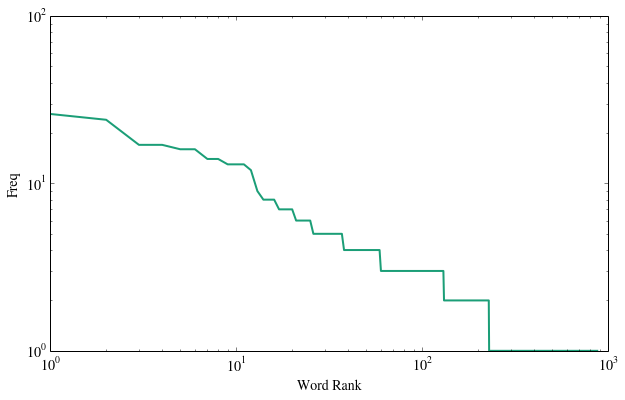

In [24]:
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

A plot of frequency values is intuitive and convenient, but it can also be useful to group together data values into bins that correspond to a range of frequencies. For example, how many words have a frequency between 1 and 5, between 5 and 10, between 10 and 15, and so forth? A histogram is designed for precisely this purpose and provides a convenient visualization for displaying tabulated frequencies as adjacent rectangles, where the area of each rectangle is a measure of the data values that fall within that particular range of values. 

Next histograms of tabulated frequency data for words, screen names, and hashtags, each displaying a particular kind of data that is grouped by frequency, look back to the corresponding tabular data and consider that there are a large number of words, screen names, or hashtags that have low frequencies and appear few times in the text; however, when we combine all of these low-frequency terms and bin them together into a range of "all words with frequency between 1 and 10," we see that the total number of these low-frequency words accounts for most of the text. More concretely, we see that there are approximately 10 words that account for almost all of the frequencies as rendered by the area of the large blue rectangle, while there are just a couple of words with much higher frequencies: "#MentionSomeoneImportantForYou" and "RT," with respective frequencies of 34 and 92 as given by our tabulated data.

Likewise, in the histogram of retweet frequencies, we see that there are a select few tweets that are retweeted with a much higher frequencies than the bulk of the tweets, which are retweeted only once and account for the majority of the volume given by the largest blue rectangle on the left side of the histogram.

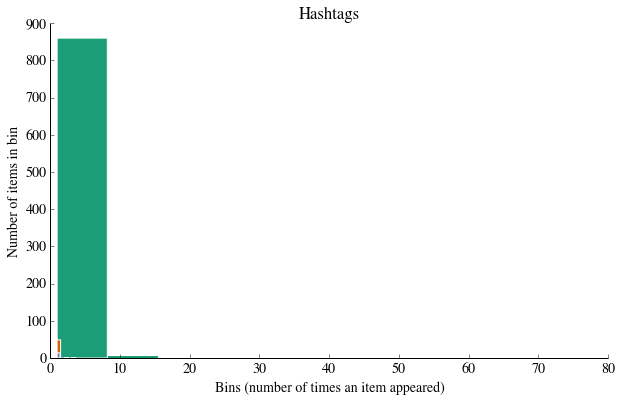

In [38]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(c.values())
    remove_border()
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    #plt.figure()
    #remove_border()

[1, 1, 1, 3, 3, 2, 3, 2, 1, 2, 2, 8, 3, 2, 1, 3]


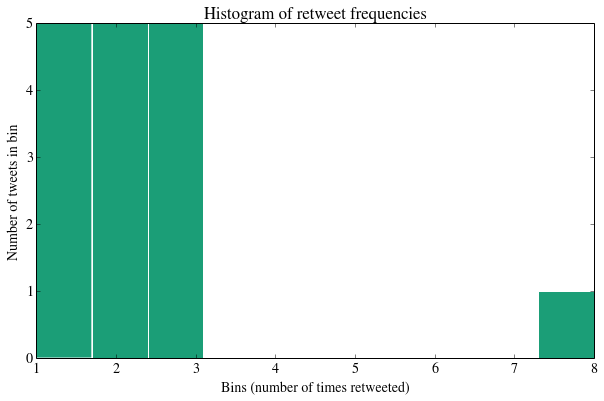

In [29]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _ in retweets]

plt.hist(counts)
plt.title("Histogram of retweet frequencies")
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

print counts

##Transfering data using the Clipboard

A handy way to grab data is to use the **read_clipboard method**, which takes the contents of the **clipboard buffer** and passes them to the read_table method. For instance, you can copy the following text to the clipboard (CTRL-C on many operating systems):

  A B C  
x 1 4 p  
y 2 5 q  
z 3 6 r  

And then import the data directly to a **DataFrame** by calling:

In [25]:
clipdf = pd.read_clipboard()
clipdf

,A,B,C
x,1,4,p
y,2,5,q
z,3,6,r


In [28]:
df = pd.DataFrame(np.random.randn(10,10))
df.to_clipboard()
pd.read_clipboard()

,0,1,2,3,4,5,6,7,8,9
0,0.445484,-1.726939,-0.803790,-0.352417,-0.979033,-1.337881,-0.867255,-0.523532,0.320852,0.843440
1,-0.247054,0.066216,0.264646,-0.528848,-0.399268,0.265917,1.886302,-1.560952,-0.431752,-0.642654
2,1.079251,0.801562,0.718280,-1.053267,-0.699632,0.688986,0.449936,1.048859,-0.395855,2.099105
3,0.477199,-0.331622,0.192500,-0.690828,-0.682078,-0.324446,0.337568,0.437147,0.623326,-0.302053
4,-0.102457,0.232483,0.613896,1.159289,-0.792233,0.726974,-0.775127,-1.914875,-0.033875,-0.133289
5,0.435930,0.986884,1.229685,-0.393746,1.812091,-1.049905,-0.514411,0.269162,1.986914,0.797323
6,-0.377658,0.885798,0.418364,-0.287936,0.584793,-1.976167,0.633389,-0.911546,-1.002134,-1.177509
7,0.127258,-0.861335,0.452441,1.437760,-0.558890,0.886835,1.407203,-0.467110,0.517097,0.496009
8,0.145878,1.430670,1.821520,1.515288,-2.437913,-1.568449,-2.389885,0.924258,0.391467,0.061432
9,1.001468,-0.929612,-0.979877,1.354407,-1.094605,0.564911,-1.622655,2.652130,0.958631,1.241469


##Working with Data Bases: SQLite
Obviously, all the data retrived can be saved in a **Data Base** (SQL or NoSQL) using the appropiate package (e.g. `import MySQLdb`, `import sqlite3` or `import sqlalchemy`). About *data persistence* you can find more information [here](http://docs.python.org/2/library/persistence).
Here we will work witht he most common and extended SQL database: **SQLite**. It is is a relational database management system contained in a small (around 700 KB) C programming library. In contrast to other database management systems, SQLite is not a separate process that is accessed from the client application, but an integral part of it. SQLite is the most widely deployed SQL database engine, and the source code for SQLite is in the public domain. 

####The Basics of SQLite with Python

- **First**, `connect` to the database using the database library's `connect` method. 
- **Second**, get a `cursor` which will allow us to `execute` SQL commands
- **Third**, We can now execute any SQL commands that we want in the database using the cursor's `execute` method. Querying the database simply involves writing the appropriate SQL and placing it inside a string in the `execute` method call.

Let's start importing the package, creating a new Data Base, a Conexion and a cursor... and checking the SQLite version:


In [27]:
import sqlite3 as sql3

# First, build the DataBase and the conexion via SQLite3
db = sql3.connect('test.db')

# Second, build the CURSOR which let us execute SQL commands
cur = db.cursor()

# Third, We can now execute any SQL commands that we want in the 
# database using the cursor's execute method

cur.execute('SELECT SQLITE_VERSION()')
data = cur.fetchone()

print "SQLite version: %s" % data
    

SQLite version: 3.6.21


Let us begin creating a Table in test.db

In [28]:
db = sql3.connect('test.db')
cur = db.cursor()

cur.execute("DROP TABLE IF EXISTS Cars") 
cur.execute("CREATE TABLE Cars(Id INT, Name TEXT, Price INT)")
   

###Inserting and Quering Data

In [33]:
db = sql3.connect('test.db')

with db:
    
    cur = db.cursor()
    cur.execute("INSERT INTO Cars VALUES(1,'Audi',52642)")
    cur.execute("INSERT INTO Cars VALUES(2,'Mercedes',57127)")
    cur.execute("INSERT INTO Cars VALUES(3,'Skoda',9000)")
    cur.execute("INSERT INTO Cars VALUES(4,'Volvo',29000)")
    cur.execute("INSERT INTO Cars VALUES(5,'Bentley',350000)")
    cur.execute("INSERT INTO Cars VALUES(6,'Citroen',21000)")
    cur.execute("INSERT INTO Cars VALUES(7,'Hummer',41400)")
    cur.execute("INSERT INTO Cars VALUES(8,'Volkswagen',21600)")

or also... 

In [43]:
cars = (
    (1, 'Audi', 52642),
    (2, 'Mercedes', 57127),
    (3, 'Skoda', 9000),
    (4, 'Volvo', 29000),
    (5, 'Bentley', 350000),
    (6, 'Hummer', 41400),
    (7, 'Volkswagen', 21600)
)

con = sql3.connect('test.db')

with con:
    
    cur = con.cursor()    
    
    # This script drops a Cars table if it exists and (re)creates it.
    cur.execute("DROP TABLE IF EXISTS Cars")
    cur.execute("CREATE TABLE Cars(Id INT, Name TEXT, Price INT)")
    
    # The first SQL statement drops the Cars table, if it exists. 
    # The second SQL statement creates the Cars table.
    
    cur.executemany("INSERT INTO Cars VALUES(?, ?, ?)", cars)

In Python, we can use the `fetchall()` method to fetch all the records in the table:

In [24]:
import sqlite3 as sql3

db = sql3.connect('test.db')

cur = db.cursor()

cur.execute('SELECT * FROM Cars')

rows = cur.fetchall()

# We can print all ...
print rows 

print '='*65

# Or one by one from rows...

for row in rows:
    print row
    
    

[(1, u'Audi', 62300), (2, u'Mercedes', 57127), (3, u'Skoda', 9000), (4, u'Volvo', 29000), (5, u'Bentley', 350000), (6, u'Citroen', 21000), (7, u'Hummer', 41400), (8, u'Volkswagen', 21600)]
(1, u'Audi', 62300)
(2, u'Mercedes', 57127)
(3, u'Skoda', 9000)
(4, u'Volvo', 29000)
(5, u'Bentley', 350000)
(6, u'Citroen', 21000)
(7, u'Hummer', 41400)
(8, u'Volkswagen', 21600)


Alternatively, to get the results into Python we then use either the `fetchone()` method to fetch one record at a time (it returns None when there are no more records to fetch so that you know when to stop)

In [40]:
con = sql3.connect('test.db')
cur = con.cursor()

cur.execute('SELECT * FROM Cars')
record = cur.fetchone()

while record:
    print record
    record = cur.fetchone()

(1, u'Audi', 52642)
(2, u'Mercedes', 57127)
(3, u'Skoda', 9000)
(4, u'Volvo', 29000)
(5, u'Bentley', 350000)
(6, u'Citroen', 21000)
(7, u'Hummer', 41400)
(8, u'Volkswagen', 21600)


Another possibility ... 

In [41]:
con = sql3.connect('test.db')

with con:    
    
    cur = con.cursor()    
    cur.execute("SELECT * FROM Cars")
    
    rows = cur.fetchall()
    
    for row in rows:
        print row[0], row[1], row[2]
        

1 Audi 52642
2 Mercedes 57127
3 Skoda 9000
4 Volvo 29000
5 Bentley 350000
6 Citroen 21000
7 Hummer 41400
8 Volkswagen 21600


And a technically improved version of the previous code to retrive data could be...

In [42]:
con = sql3.connect('test.db')

with con:
    
    cur = con.cursor()    
    cur.execute("SELECT * FROM Cars")

    while True:
      
        row = cur.fetchone()
        
        if row == None:
            break
            
        print row[0], row[1], row[2]

1 Audi 52642
2 Mercedes 57127
3 Skoda 9000
4 Volvo 29000
5 Bentley 350000
6 Citroen 21000
7 Hummer 41400
8 Volkswagen 21600


###Parameterized queries

When we use parameterized queries, we use placeholders instead of directly writing the values into the statements. Parameterized queries increase security and performance.

The Python **SQLite3** module supports two types of placeholders. Question marks and named placeholders.

In [44]:
uId = 1
uPrice = 62300 

con = sql3.connect('test.db')

with con:

    cur = con.cursor()    

    cur.execute("UPDATE Cars SET Price=? WHERE Id=?", (uPrice, uId))        
    con.commit()
    
    print "Number of rows updated: %d" % cur.rowcount

Number of rows updated: 1


The second example uses parameterized statements with named placeholders:

In [45]:
uId = 4

con = sql3.connect('test.db')

with con:

    cur = con.cursor()    

    cur.execute("SELECT Name, Price FROM Cars WHERE Id=:Id", 
        {"Id": uId})        
    con.commit()
    
    row = cur.fetchone()
    print row[0], row[1]

Volvo 29000


###Metadata

Metadata is information about the data in the database. Metadata in a SQLite contains information about the tables and columns, in which we store data. Number of rows affected by an SQL statement is a metadata. Number of rows and columns returned in a result set belong to metadata as well.

Metadata in SQLite can be obtained using the PRAGMA command. SQLite objects may have attributes, which are metadata. Finally, we can also obtain specific metatada from querying the SQLite system sqlite_master table.

In [46]:
con = sql3.connect('test.db')

with con:
    
    cur = con.cursor()    
    
    cur.execute('PRAGMA table_info(Cars)')
    
    data = cur.fetchall()
    
    for d in data:
        print d[0], d[1], d[2]

0 Id INT
1 Name TEXT
2 Price INT


In the next example, we want to print all rows from the *Cars table* with their column names.

In [47]:
con = sql3.connect('test.db')

with con:
    
    cur = con.cursor()    
    cur.execute('SELECT * FROM Cars')
    
    col_names = [cn[0] for cn in cur.description]
    
    rows = cur.fetchall()
    
    print "%-5s %-15s %s" % (col_names[0], col_names[1], col_names[2])

    for row in rows:    
        print "%-5s %-15s %s" % row

Id    Name            Price
1     Audi            62300
2     Mercedes        57127
3     Skoda           9000
4     Volvo           29000
5     Bentley         350000
6     Hummer          41400
7     Volkswagen      21600


Another example related to the metadata, we list all tables in the `test.db` database.

In [48]:
con = sql3.connect('test.db')

with con:
    
    cur = con.cursor()    
    cur.execute("SELECT name FROM sqlite_master WHERE type='table'")

    rows = cur.fetchall()

    for row in rows:
        print row[0]

Friends
Cars


###Export and Import Data

We can dump data in an SQL format to create a simple backup of our database tables:

In [49]:
# The data from the table is being written to the file:

def writeData(data):
    
    f = open('cars.sql', 'w')
    
    with f:
        f.write(data)

# We create a temporary table in the memory: 

con = sql3.connect(':memory:')

# These lines create a Cars table, insert values and delete rows, 
# where the Price is less than 30000 units.

with con:
    
    cur = con.cursor()
    
    cur.execute("DROP TABLE IF EXISTS Cars")
    cur.execute("CREATE TABLE Cars(Id INT, Name TEXT, Price INT)")
    cur.executemany("INSERT INTO Cars VALUES(?, ?, ?)", cars)
    cur.execute("DELETE FROM Cars WHERE Price < 30000")
    
    # The con.iterdump() returns an iterator to dump the database 
    # in an SQL text format. The built-in join() function takes 
    # the iterator and joins all the strings in the iterator separated 
    # by a new line. This data is written to the cars.sql file in 
    # the writeData() function.
    
    data = '\n'.join(con.iterdump())
    
    writeData(data)

In [50]:
print data

BEGIN TRANSACTION;
CREATE TABLE Cars(Id INT, Name TEXT, Price INT);
INSERT INTO "Cars" VALUES(1,'Audi',52642);
INSERT INTO "Cars" VALUES(2,'Mercedes',57127);
INSERT INTO "Cars" VALUES(5,'Bentley',350000);
INSERT INTO "Cars" VALUES(6,'Hummer',41400);
COMMIT;


Now, we are going to perform a *reverse* operation. We will import the dumped table back into memory.

In [51]:
def readData():
    
    f = open('cars.sql', 'r')
    
    with f:
        data = f.read()
        return data
        

con = sql3.connect(':memory:')

with con:   

    cur = con.cursor()
    
    sql_query = readData()
    cur.executescript(sql_query)
    
    cur.execute("SELECT * FROM Cars")
    
    rows = cur.fetchall()
    
    for row in rows:
        print row    

(1, u'Audi', 52642)
(2, u'Mercedes', 57127)
(5, u'Bentley', 350000)
(6, u'Hummer', 41400)


###Transactions

A **transaction** is an atomic unit of database operations against the data in one or more databases. The effects of all the SQL statements in a transaction can be either all committed to the database or all rolled back.
In SQLite, any command other than the `SELECT` will start an implicit transaction. Also, within a transaction a command like `CREATE TABLE` ..., `VACUUM`, `PRAGMA`, will commit previous changes before executing.
Manual transactions are started with the `BEGIN TRANSACTION` statement and finished with the `COMMIT` or `ROLLBACK` statements.
SQLite supports three non-standard transaction levels. `DEFERRED`, `IMMEDIATE` and `EXCLUSIVE`. SQLite Python module also supports an autocommit mode, where all changes to the tables are immediately effective.

In [52]:
# We create a friends table and try to fill it with data. 
# However, the data is not commited...
# because the commit() menhod is commented. 
# If we uncomment the line, 
# the line will be written to the table:

#import sqlite3 as sql

try:
    con = sql3.connect('test.db')
    cur = con.cursor()    
    cur.execute("DROP TABLE IF EXISTS Friends")
    cur.execute("CREATE TABLE Friends(Id INTEGER PRIMARY KEY, Name TEXT)")
    cur.execute("INSERT INTO Friends(Name) VALUES ('Tom')")
    cur.execute("INSERT INTO Friends(Name) VALUES ('Rebecca')")
    cur.execute("INSERT INTO Friends(Name) VALUES ('Jim')")
    cur.execute("INSERT INTO Friends(Name) VALUES ('Robert')")
    
#---> con.commit()
            
except sql3.error, e:
    
    if con:
        con.rollback()
    
    print "Error %s:" % e.args[0]
    sys.exit(1)
    
finally:
    
    if con:
        con.close() 

## Code Example 04: A Data Base of 10.000 Movies

The `pandas.io.sql` module provides a collection of query wrappers to both facilitate data retrieval and to reduce dependency on DB-specific API. These wrappers only support the Python database adapters which respect the Python DB-API.

Let us use, in the following example, a list of the 10.000 movies made since 1950 with the most IMDB user ratings. Download the data at http://bit.ly/cs109_imdb and save it as text file in your working directory.

In [25]:
# First, load the data: 
names = ['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres']
movies = pd.read_csv('imdb_top_10000.txt', delimiter='\t', names = names)\
        .dropna()

# In order to load Dataframes into a SQl dataBase, we need 
# a set of functions from pandas to link with the SQL 

from pandas.io import sql


# third, let us create your connection.
cnx = sql3.connect('movies.db')
cnx.execute("DROP TABLE IF EXISTS movies")

# Load the DataFrame in SQLite3
sql.write_frame(movies, name='movies', con=cnx)

# Retriving the data from SQLite3
# p1 = sql.read_frame('SELECT * FROM movies', cnx)

p3 = sql.read_frame('SELECT * FROM movies WHERE year=2001', cnx)

print "Size of the Table of the Database (rows,columns): ",  p3.shape
print '='*65
p3.head()

Size of the Table of the Database (rows,columns):  (353, 7)


,imdbID,title,year,score,votes,runtime,genres
0,tt0120737,The Lord of the Rings: The Fellowship of the R...,2001,8.8,451263,178 mins.,Action|Adventure|Drama|Fantasy
1,tt0246578,Donnie Darko (2001),2001,8.2,246756,113 mins.,Drama|Mystery|Sci-Fi
2,tt0211915,Am\xe9lie (2001),2001,8.5,215732,122 mins.,Comedy|Fantasy|Romance
3,tt0126029,Shrek (2001),2001,7.9,185372,90 mins.,Animation|Adventure|Comedy|Family|Fantasy
4,tt0241527,Harry Potter and the Sorcerer's Stone (2001),2001,7.2,159229,152 mins.,Adventure|Family|Fantasy|Mystery


In [66]:
cnx = sql3.connect('movies.db')

with cnx:
    
    cur = cnx.cursor()    
    cur.execute('PRAGMA table_info(movies)')
    # cur.execute("DROP TABLE IF EXISTS movies")
    data = cur.fetchall()
    
    for d in data:
        print d[0], d[1], d[2]

0 imdbID TEXT
1 title TEXT
2 year INTEGER
3 score REAL
4 votes INTEGER
5 runtime TEXT
6 genres TEXT


##Code Example 05: Price Time-Series and DataFramework Storage in a SQLite Data Base

Functions from `pandas.io.data` extract data from various Internet sources into a DataFrame. Currently the following sources are supported:
   
   - **Yahoo! Finance** with `web.DataReader(ticker,'yahoo', start, end)`
   - **Google Finance** with `web.DataReader(ticker,'google', start, end)`
   - **St. Louis FED (FRED)** with `web.DataReader('GDP', 'fred', start, end)`
   - **Kenneth French’s** data library with `web.DataReader("5_Industry_Portfolios", "famafrench")`

It should be noted, that various sources support different kinds of data, so not all sources implement the same methods and the data elements returned might also differ.

In [7]:
# Download data from Yahoo! Finance: 

import pandas.io.data as web

start = pd.datetime(2013, 1, 1)
end = pd.datetime(2013, 12, 1)

# f=web.DataReader("F", 'yahoo', start, end)

all_data = {}

for ticker in ['AAPL', 'GOOG', 'MSFT', 'DELL', 'GS', 'MS', 'BAC']:
    all_data[ticker] = web.DataReader(ticker,'yahoo', start, end)

In [18]:
# Create a pandas-DataFrame with the info 
# coming from Yahoo! Finance

prices = pd.DataFrame({tic: data['Adj Close'] 
                       for tic, data in all_data.iteritems()})
print prices[['AAPL','GOOG','GS']].describe()
print '='*65
prices.head()

             AAPL         GOOG          GS
count  231.000000   231.000000  231.000000
mean   458.926234   866.051082  154.092944
std     39.097435    81.248638    8.998906
min    383.180000   702.870000  129.240000
25%    427.175000   806.525000  147.780000
50%    447.730000   871.980000  155.660000
75%    492.085000   896.380000  161.740000
max    556.070000  1063.110000  169.190000


,AAPL,BAC,DELL,GOOG,GS,MS,MSFT
Date,,,,,,,
2013-01-02,535.58,11.99,10.50,723.25,129.95,19.46,26.81
2013-01-03,528.82,11.92,10.75,723.67,129.24,19.42,26.45
2013-01-04,514.09,12.07,10.78,737.97,132.76,20.03,25.95
2013-01-07,511.06,12.05,10.87,734.75,132.51,19.64,25.91
2013-01-08,512.44,11.94,10.59,733.30,131.32,19.49,25.77


In [34]:
# Notice that writing your DataFrame into 
# a database works only with SQLite. 
# Moreover, the index will currently be 
# dropped, therefore first, we have 
# to move it as column

prices['Dates']=prices.index[:]
prices.head()

,AAPL,BAC,DELL,GOOG,GS,MS,MSFT,Dates
Date,,,,,,,,
2013-01-02,535.58,11.99,10.50,723.25,129.95,19.46,26.81,2013-01-02 00:00:00
2013-01-03,528.82,11.92,10.75,723.67,129.24,19.42,26.45,2013-01-03 00:00:00
2013-01-04,514.09,12.07,10.78,737.97,132.76,20.03,25.95,2013-01-04 00:00:00
2013-01-07,511.06,12.05,10.87,734.75,132.51,19.64,25.91,2013-01-07 00:00:00
2013-01-08,512.44,11.94,10.59,733.30,131.32,19.49,25.77,2013-01-08 00:00:00


In [35]:
# To load DataFrames into a SQLite DataBase we need something from pandas
# that transforms DataFrames into tables and back 

from pandas.io import sql

# Create your connection

cnx = sql3.connect('prices.db')

# Load the DataFrame in SQLite3
cur = cnx.cursor()    
cur.execute("DROP TABLE IF EXISTS prices")

sql.write_frame(prices, name='prices', con = cnx)

In [36]:
# Let's retrive the prices from the DataBase:

cnx = sql3.connect('prices.db')

with cnx:
    
    cur = cnx.cursor()    
    cur.execute('PRAGMA table_info(prices)')
    
    table = cur.fetchall()
    
    for d in table:
        print d[0], d[1]

0 AAPL
1 BAC
2 DELL
3 GOOG
4 GS
5 MS
6 MSFT
7 Dates


In [37]:
# And finally, let's build the pandas-DataFrame of prices
# from the SQLite3-database 

from pandas.io import sql
from pandas.lib import Timestamp

cnx = sql3.connect('prices.db')

allp =  sql.read_frame("SELECT * FROM prices", cnx)
allp.Dates = allp.Dates.apply(Timestamp)
allp = allp.set_index('Dates')

apple = sql.read_frame("SELECT AAPL,Dates FROM prices", cnx)
apple.Dates = apple.Dates.apply(Timestamp)
apple = apple.set_index('Dates')


# apple.set_index(rng)
print '='*65
print allp[['AAPL','GOOG','GS']].describe()
print '='*65
apple.head()

             AAPL         GOOG          GS
count  231.000000   231.000000  231.000000
mean   458.926234   866.051082  154.092944
std     39.097435    81.248638    8.998906
min    383.180000   702.870000  129.240000
25%    427.175000   806.525000  147.780000
50%    447.730000   871.980000  155.660000
75%    492.085000   896.380000  161.740000
max    556.070000  1063.110000  169.190000


,AAPL
Dates,
2013-01-02,535.58
2013-01-03,528.82
2013-01-04,514.09
2013-01-07,511.06
2013-01-08,512.44


#**Data Exploration**: Basic workflow in data analysis with **pandas**

In this section , we are following the methodology and some of the examples of *Chris Beaumont*, from CS109-Harvard. 

The basic workflow to work with data and pandas would be as follows:

1. **Build** a **DataFrame** from the data (ideally, put *all* data in this object)
2. **Clean** the **DataFrame**. It should have the following properties:
   * Each row describes a single object or observation
   * Each column describes a property of that object
   * Columns are numeric whenever appropriate
   * Columns contain atomic properties that cannot be further decomposed
3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of 
the data's properties, and likely generates several questions for you to followup in subsequent analysis.

##Build a DataFrame

A **DataFrame** is a 2-dimensional labeled data structure with columns of potentially different types. It is defined in **pandas** package.  You can think of it *like a spreadsheet* or *SQL table*, or *a dict of Series objects*. It is generally the most commonly used **pandas** object. Like Series, **DataFrame** accepts many different kinds of input:

- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- Structured or record ndarray
- A Series
- Another DataFrame

Along with the data, you can optionally pass **index** (row labels) and **columns** (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

Let us see that in a simple example: names and births

In [101]:
names = ['Vlad','Sam','Tomm','Teo','Liana']
WorkID = [102, 340, 560, 765, 304]

print names
print WorkID
# to merge this two lists we will use the zip function

pyclass = zip(names,WorkID)
print pyclass


['Vlad', 'Sam', 'Tomm', 'Teo', 'Liana']
[102, 340, 560, 765, 304]
[('Vlad', 102), ('Sam', 340), ('Tomm', 560), ('Teo', 765), ('Liana', 304)]


Let us use now a **DataFrame** from **pandas**


In [102]:
df = pd.DataFrame(data = pyclass, columns=['Names','WorkID'])
df

,Names,WorkID
0,Vlad,102
1,Sam,340
2,Tomm,560
3,Teo,765
4,Liana,304


We can export the DataFrame to a `csv` file for storage or just because we want to use it in the next session

In [104]:
df.to_csv('WorkID_pyclass.csv', index=False, header=True)
del df

In [106]:
Location = 'C:\\Users\\Suso\\WorkID_pyclass.csv'
df = pd.read_csv (Location)
print df
print '-'*100
print df.Names
print '-'*100
print df.WorkID


   Names  WorkID
0   Vlad     102
1    Sam     340
2   Tomm     560
3    Teo     765
4  Liana     304
----------------------------------------------------------------------------------------------------
0     Vlad
1      Sam
2     Tomm
3      Teo
4    Liana
Name: Names, dtype: object
----------------------------------------------------------------------------------------------------
0    102
1    340
2    560
3    765
4    304
Name: WorkID, dtype: int64


Some basics about how to view the data

In [8]:
df.head(2)

,Names,Births
0,Vlad,102
1,Sam,340


In [9]:
df.tail(-2)

,Names,Births
2,Tomm,560
3,Teo,765
4,Liana,304


In [143]:
df = pd.DataFrame({'int_col' : [1,2,6,8,-1], 
                   'float_col' : [0.1, 0.2,0.2,10.1,None], 
                   'str_col' : ['a','b',None,'c','a']})
df


,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


In [54]:
df.index

Int64Index([0, 1, 2, 3, 4], dtype=int64)

In [144]:
df.T

,0,1,2,3,4
float_col,0.1,0.2,0.2,10.1,NaN
int_col,1,2,6,8,-1
str_col,a,b,None,c,a


In [145]:
df.ix[1:,['float_col','int_col']]

,float_col,int_col
1,0.2,2
2,0.2,6
3,10.1,8
4,NaN,-1


In [55]:
df.values

array([[0.1, 1, 'a'],
       [0.2, 2, 'b'],
       [0.2, 6, None],
       [10.1, 8, 'c'],
       [nan, -1, 'a']], dtype=object)

In [56]:
df.describe()

,float_col,int_col
count,4.00000,5.000000
mean,2.65000,3.200000
std,4.96689,3.701351
min,0.10000,-1.000000
25%,0.17500,1.000000
50%,0.20000,2.000000
75%,2.67500,6.000000
max,10.10000,8.000000


In [147]:
df.sort_index(axis=0, ascending=True)

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


Another example, this time more statisticallly related...

In [39]:
np.random.seed(12345)
#data = pd.DataFrame(np.random.randn(1000, 4))
df = pd.DataFrame(np.random.randn(1000000, 4).cumsum(0), 
               columns=['A', 'B', 'C', 'D'], 
               index=np.arange(0, 1000000, 1))

print df.head(15)
df.describe()


           A         B         C         D
0  -0.204708  0.478943 -0.519439 -0.555730
1   1.761073  1.872349 -0.426531 -0.273984
2   2.530095  3.118784  0.580659 -1.570205
3   2.805087  3.347697  1.933575 -0.683776
4   0.803450  2.975854  3.602601 -1.122346
5   0.263708  3.452839  6.851545 -2.143573
6  -0.313379  3.576961  7.154158 -1.619801
7  -0.312439  4.920770  6.440614 -2.450955
8  -2.682670  3.060010  5.579857 -1.890809
9  -3.948605  3.179837  4.516344 -1.557927
10 -6.308024  2.980294  2.974349 -2.528663
11 -7.615054  3.266643  3.352333 -3.282549
12 -7.283768  4.616386  3.422210 -3.035875
13 -7.295630  5.621197  4.749404 -3.955137
14 -8.844736  5.643382  5.507767 -4.615661


,A,B,C,D
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,-423.249054,702.366184,-18.853142,1264.969888
std,251.114913,287.158321,290.286721,678.587545
min,-1018.537576,0.478943,-744.922611,-259.002854
25%,-643.267952,519.927683,-148.238073,858.665973
50%,-428.466343,732.711656,35.948866,1473.969847
75%,-199.460833,900.041707,180.350337,1820.117473
max,63.375785,1377.444746,662.579391,2158.960227


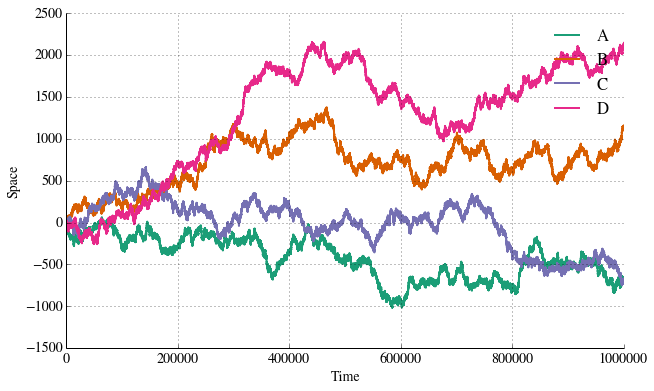

In [40]:
df.plot()
plt.xlabel("Time")
plt.ylabel("Space")
plt.legend(frameon=False)
remove_border()

But let us play more *professionally*. Let us use a higher amount of data to do some serious Data Analysis: a list of the 10,000 movies made since 1950 with the most IMDB user ratings. Download the data at http://bit.ly/cs109_imdb and save it as text file in your working directory.

In [41]:
names = ['imdbID', 'title', 'year', 'score', 
         'votes', 'runtime', 'genres']

data = pd.read_csv('imdb_top_10000.txt', 
                   delimiter='\t', names = names).dropna()

print "Number of rows: %i" % data.shape[0]

data.head(10)  # print the first 10 rows

Number of rows: 9999


,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller
5,tt0109830,Forrest Gump (1994),1994,8.7,368994,142 mins.,Comedy|Drama|Romance
6,tt0169547,American Beauty (1999),1999,8.6,338332,122 mins.,Drama
7,tt0499549,Avatar (2009),2009,8.1,336855,162 mins.,Action|Adventure|Fantasy|Sci-Fi
8,tt0108052,Schindler's List (1993),1993,8.9,325888,195 mins.,Biography|Drama|History|War
9,tt0080684,Star Wars: Episode V - The Empire Strikes Back...,1980,8.8,320105,124 mins.,Action|Adventure|Family|Sci-Fi


##Clean the DataFrame

There are several problems with the **DataFrame** at this point:

1. The runtime column describes a number, but is stored as a string
2. The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
3. The movie year is repeated in the title and year column

###Fixing the runtime column

The following snipptet converts a string like '142 mins.' to the number 142:

In [42]:
dirty = '142 mins.'
number, text = dirty.split(' ')
clean = int(number)
print number

142


We can package this up into a list comprehension

In [43]:
clean_runtime = [float(r.split(' ')[0]) for r in data.runtime]
data['runtime'] = clean_runtime
data.head()


,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller


In [44]:
data[['year','score']].head(15)

,year,score
0,1994,9.2
1,1994,9.0
2,1999,8.8
3,1999,8.7
4,2010,8.9
5,1994,8.7
6,1999,8.6
7,2009,8.1
8,1993,8.9
9,1980,8.8


In [45]:
data['score']

0     9.2
1     9.0
2     8.8
3     8.7
4     8.9
5     8.7
6     8.6
7     8.1
8     8.9
9     8.8
10    8.3
11    8.7
12    8.7
13    7.4
14    8.4
...
9985    5.1
9986    7.3
9987    7.2
9988    5.0
9989    4.9
9990    6.3
9991    7.6
9992    5.8
9993    5.2
9994    6.7
9995    7.0
9996    5.2
9997    6.5
9998    6.5
9999    6.9
Name: score, Length: 9999, dtype: float64

In [46]:
print "type of df[['runtime']]:\t", type(data[['runtime']]) 

type of df[['runtime']]:	<class 'pandas.core.frame.DataFrame'>


In [47]:
data.votes.unique()

array([619479, 490065, 458173, ...,   1358,   1357,   1356], dtype=int64)

### Splitting up the genres
We can use the concept of *indicator variables* to split the genres column into many columns. Each new column will correspond to a single genre, and each cell will be True or False.

In [48]:
#determine the unique genres
genres = set()
for m in data.genres:
    genres.update(g for g in m.split('|'))
genres = sorted(genres)

#make a column for each genre
for genre in genres:
    data[genre] = [genre in movie.split('|') for movie in data.genres]
         
data.head()

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142,Crime|Drama,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154,Crime|Thriller,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,tt0137523,Fight Club (1999),1999,8.8,458173,139,Drama|Mystery|Thriller,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
3,tt0133093,The Matrix (1999),1999,8.7,448114,136,Action|Adventure|Sci-Fi,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,tt1375666,Inception (2010),2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False


### Removing year from the title
We can fix each element by stripping off the last 7 characters

In [49]:
data['title'] = [t[0:-7] for t in data.title]
data.head()

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142,Crime|Drama,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction,1994,9.0,490065,154,Crime|Thriller,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,tt0137523,Fight Club,1999,8.8,458173,139,Drama|Mystery|Thriller,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
3,tt0133093,The Matrix,1999,8.7,448114,136,Action|Adventure|Sci-Fi,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,tt1375666,Inception,2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False


##Explore Global Properties

Next, we get a handle on some basic, global summaries of the DataFrame.

### Call `describe` on relevant columns

In [50]:
data[['score', 'runtime', 'votes']].describe()

,score,runtime,votes
count,9999.000000,9999.000000,9999.000000
mean,6.385989,103.580358,16605.462946
std,1.189965,26.629310,34564.883945
min,1.500000,0.000000,1356.000000
25%,5.700000,93.000000,2334.500000
50%,6.600000,102.000000,4981.000000
75%,7.200000,115.000000,15278.500000
max,9.200000,450.000000,619479.000000


In [51]:
#Notice that a runtime of 0 looks suspicious. How many movies have that?
print len(data[data.runtime == 0])

#probably best to flag those bad data as NAN
data.runtime[data.runtime == 0] = np.nan

282


In [52]:
data.runtime.describe()

count    9717.000000
mean      106.586395
std        20.230330
min        45.000000
25%        93.000000
50%       103.000000
75%       115.000000
max       450.000000
dtype: float64

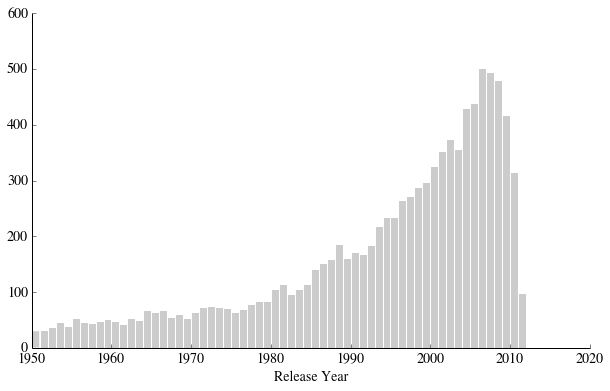

In [53]:
plt.hist(data.year, bins=np.arange(1950, 2013), color='#cccccc')
plt.xlabel("Release Year")
remove_border()


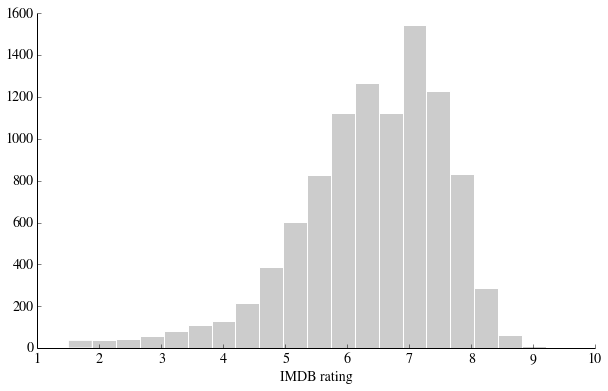

In [54]:
plt.hist(data.score, bins=20, color='#cccccc')
plt.xlabel("IMDB rating")
remove_border()

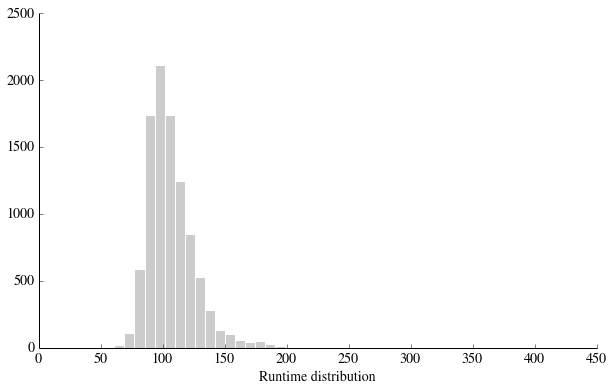

In [55]:
plt.hist(data.runtime.dropna(), bins=50, color='#cccccc')
plt.xlabel("Runtime distribution")
remove_border()

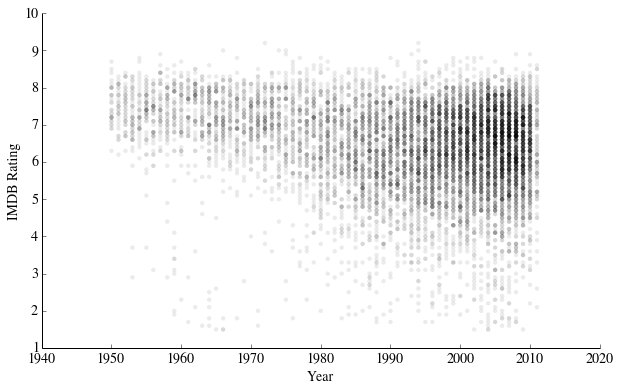

In [56]:
#hmm, more bad, recent movies. Real, or a selection bias?

plt.scatter(data.year, data.score, lw=0, alpha=.08, color='k')
plt.xlabel("Year")
plt.ylabel("IMDB Rating")
remove_border()

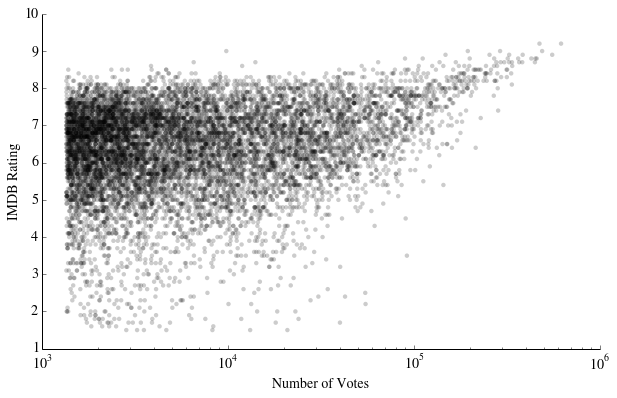

In [57]:
plt.scatter(data.votes, data.score, lw=0, alpha=.2, color='k')
plt.xlabel("Number of Votes")
plt.ylabel("IMDB Rating")
plt.xscale('log')
remove_border()

Identify some outliers

In [58]:
# low-score movies with lots of votes
data[(data.votes > 9e4) & (data.score < 5)]\
    [['title', 'year', 'score', 'votes', 'genres']]

,title,year,score,votes,genres
317,New Moon,2009,4.5,90457,Adventure|Drama|Fantasy|Romance
334,Batman & Robin,1997,3.5,91875,Action|Crime|Fantasy|Sci-Fi


In [59]:
# The lowest rated movies
data[data.score == data.score.min()]\
    [['title', 'year', 'score', 'votes', 'genres']]

,title,year,score,votes,genres
1982,Manos: The Hands of Fate,1966,1.5,20927,Horror
2793,Superbabies: Baby Geniuses 2,2004,1.5,13196,Comedy|Family
3746,Daniel the Wizard,2004,1.5,8271,Comedy|Crime|Family|Fantasy|Horror
5158,Ben & Arthur,2002,1.5,4675,Drama|Romance
5993,Night Train to Mundo Fine,1966,1.5,3542,Action|Adventure|Crime|War
6257,Monster a-Go Go,1965,1.5,3255,Sci-Fi|Horror
6726,Dream Well,2009,1.5,2848,Comedy|Romance|Sport


In [60]:
# The highest rated movies
data[data.score == data.score.max()]\
    [['title', 'year', 'score', 'votes', 'genres']]

,title,year,score,votes,genres
0,The Shawshank Redemption,1994,9.2,619479,Crime|Drama
26,The Godfather,1972,9.2,474189,Crime|Drama


Another interesing example: let us run aggregation functions like `sum` over several rows or columns... What genres are the most frequent?

In [61]:
#sum sums over rows by default
genre_count = np.sort(data[genres].sum())[::-1]
pd.DataFrame({'Genre Count': genre_count})

,Genre Count
Drama,5697
Comedy,3922
Thriller,2832
Romance,2441
Action,1891
Crime,1867
Adventure,1313
Horror,1215
Mystery,1009
Fantasy,916


*How many genres does a movie have, on average?*

In [62]:
#axis=1 sums over columns instead
genre_count = data[genres].sum(axis=1) 
print "Average movie has %0.2f genres" % genre_count.mean()
genre_count.describe()

Average movie has 2.75 genres


count    9999.000000
mean        2.753975
std         1.168910
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
dtype: float64

##Explore Group Properties

Let's split up movies by decade

In [63]:
decade =  (data.year // 10) * 10

tyd = data[['title', 'year']]
tyd['decade'] = decade

tyd.head(10)

,title,year,decade
0,The Shawshank Redemption,1994,1990
1,Pulp Fiction,1994,1990
2,Fight Club,1999,1990
3,The Matrix,1999,1990
4,Inception,2010,2010
5,Forrest Gump,1994,1990
6,American Beauty,1999,1990
7,Avatar,2009,2000
8,Schindler's List,1993,1990
9,Star Wars: Episode V - The Empire Strikes Back,1980,1980


The first concept we deal with here is pandas `groupby`. The idea is to group a dataframe by the values of a particular factor variable. The documentation can be found <a href="http://pandas.pydata.org/pandas-docs/dev/groupby.html">here</a>.

[GroupBy](http://pandas.pydata.org/pandas-docs/dev/groupby.html) will gather movies into groups with equal decade values

year
1950    7.244522
1960    7.062367
1970    6.842297
1980    6.248693
1990    6.199316
2000    6.277858
2010    6.344552
Name: Decade Mean, dtype: float64


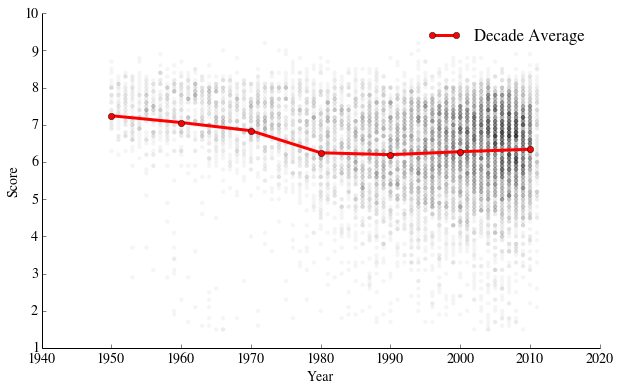

In [64]:
#mean score for all movies in each decade
decade_mean = data.groupby(decade).score.mean()
decade_mean.name = 'Decade Mean'
print decade_mean

plt.plot(decade_mean.index, decade_mean.values, 'o-',
        color='r', lw=3, label='Decade Average')
plt.scatter(data.year, data.score, alpha=.04, lw=0, color='k')
plt.xlabel("Year")
plt.ylabel("Score")
plt.legend(frameon=False)
remove_border()

We can go one further, and compute the scatter in each year as well

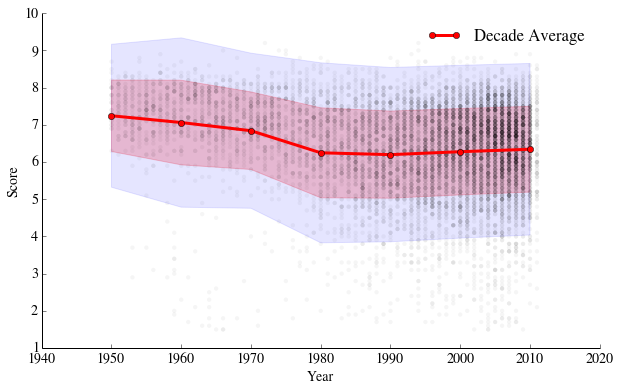

In [65]:
grouped_scores = data.groupby(decade).score

mean = grouped_scores.mean()
std = grouped_scores.std()

plt.plot(decade_mean.index, decade_mean.values, 'o-',
        color='r', lw=3, label='Decade Average')
plt.fill_between(decade_mean.index, (decade_mean + std).values,
                 (decade_mean - std).values, color='r', alpha=.2)
plt.fill_between(decade_mean.index, (decade_mean + 2*std).values,
                 (decade_mean - 2*std).values, color='b', alpha=.1)
plt.scatter(data.year, data.score, alpha=.04, lw=0, color='k')
plt.xlabel("Year")
plt.ylabel("Score")
plt.legend(frameon=False)
remove_border()

You can also iterate over a GroupBy object. Each iteration yields two variables: one of the distinct values of the group key, and the subset of the dataframe where the key equals that value. To find the most popular movie each year:

In [66]:
for year, subset in data.groupby('year'):
    print year, subset[subset.score == subset.score.max()].title.values

1950 ['Sunset Blvd.']
1951 ['Strangers on a Train']
1952 ["Singin' in the Rain"]
1953 ['The Wages of Fear' 'Tokyo Story']
1954 ['Seven Samurai']
1955 ['Diabolique']
1956 ['The Killing']
1957 ['12 Angry Men']
1958 ['Vertigo']
1959 ['North by Northwest']
1960 ['Psycho']
1961 ['Yojimbo']
1962 ['To Kill a Mockingbird' 'Lawrence of Arabia']
1963 ['The Great Escape' 'High and Low']
1964 ['Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb']
1965 ['For a Few Dollars More']
1966 ['The Good, the Bad and the Ugly']
1967 ['Cool Hand Luke']
1968 ['Once Upon a Time in the West']
1969 ['Butch Cassidy and the Sundance Kid' 'Army of Shadows']
1970 ['Patton' 'The Conformist' 'Le Cercle Rouge']
1971 ['A Clockwork Orange']
1972 ['The Godfather']
1973 ['The Sting' 'Scenes from a Marriage']
1974 ['The Godfather: Part II']
1975 ['Outrageous Class']
1976 ['Tosun Pasa']
1977 ['Star Wars: Episode IV - A New Hope']
1978 ['The Girl with the Red Scarf']
1979 ['Apocalypse Now']
1980 ['Star Wars: 

###Small multiples

Let's split up the movies by genre, and look at how their release year/runtime/IMDB score vary.
The distribution for all movies is shown as a grey background.

This isn't a standard groupby, so we can't use the `groupby` method here. A manual loop is needed

C:\Anaconda\lib\site-packages\matplotlib\figure.py:1595: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


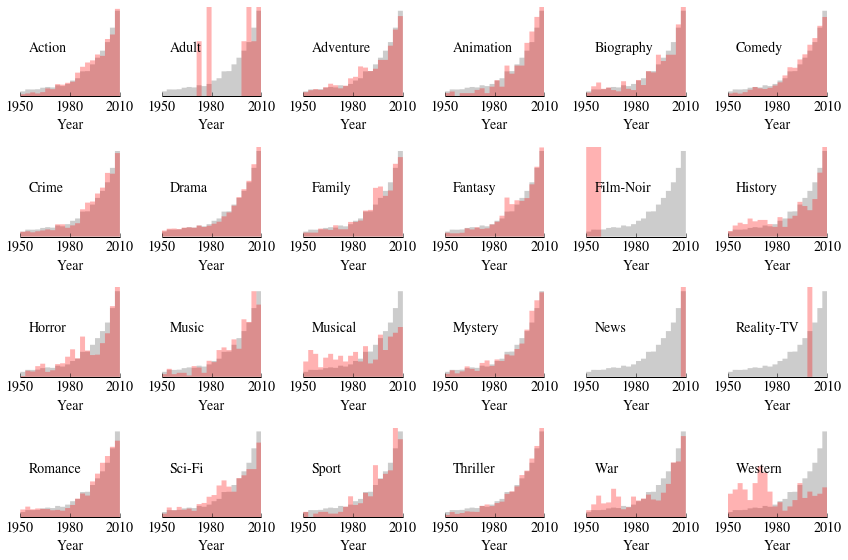

In [67]:
#create a 4x6 grid of plots.
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(12, 8), 
                         tight_layout=True)

bins = np.arange(1950, 2013, 3)
for ax, genre in zip(axes.ravel(), genres):
    
    ax.hist(data[data[genre] == 1].year, 
            bins=bins, histtype='stepfilled', normed=True, 
            color='r', alpha=.3, ec='none')
    
    ax.hist(data.year, bins=bins, histtype='stepfilled', 
            ec='None', normed=True, zorder=0, color='#cccccc')
    
    ax.annotate(genre, xy=(1955, 3e-2), fontsize=14)
    ax.xaxis.set_ticks(np.arange(1950, 2013, 30))
    ax.set_yticks([])
    remove_border(ax, left=False)
    ax.set_xlabel('Year')

Some subtler patterns here:

1. Westerns and Musicals have a more level distribution
2. Film Noir movies were much more popular in the 50s and 60s

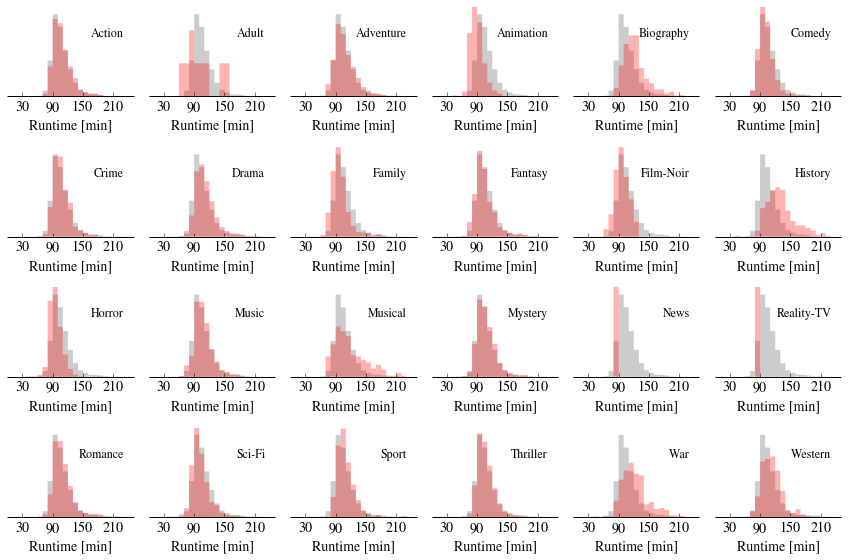

In [68]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(12, 8), 
                         tight_layout=True)

bins = np.arange(30, 240, 10)

for ax, genre in zip(axes.ravel(), genres):
    ax.hist(data[data[genre] == 1].runtime, 
            bins=bins, histtype='stepfilled', 
            color='r', ec='none', alpha=.3, normed=True)
               
    ax.hist(data.runtime, bins=bins, normed=True,
            histtype='stepfilled', ec='none', color='#cccccc',
            zorder=0)
    
    ax.set_xticks(np.arange(30, 240, 60))
    ax.set_yticks([])
    ax.set_xlabel("Runtime [min]")
    remove_border(ax, left=False)
    ax.annotate(genre, xy=(230, .02), ha='right', fontsize=12)

1. Biographies and history movies are longer
1. Animated movies are shorter
1. Film-Noir movies have the same mean, but are more conentrated around a 100 minute runtime
1. Musicals have the same mean, but greater dispersion in runtimes

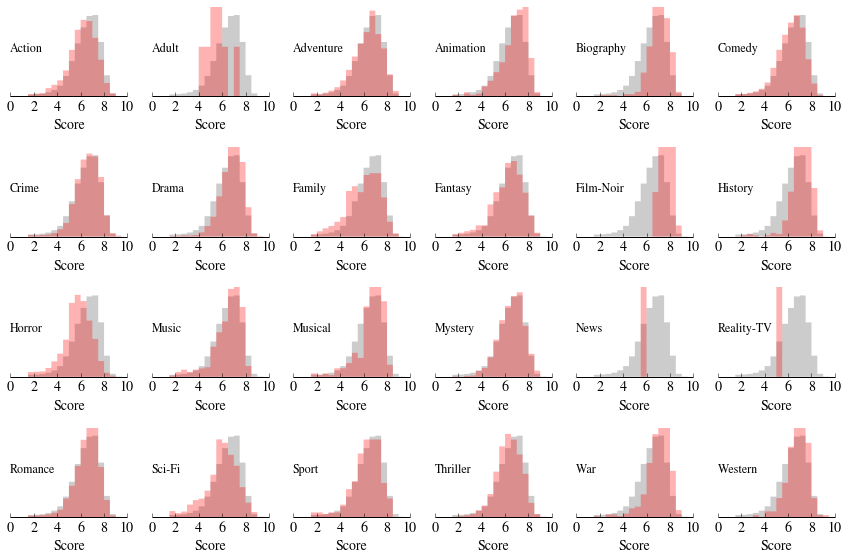

In [69]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(12, 8), 
                         tight_layout=True)

bins = np.arange(0, 10, .5)

for ax, genre in zip(axes.ravel(), genres):
    ax.hist(data[data[genre] == 1].score, 
            bins=bins, histtype='stepfilled', 
            color='r', ec='none', alpha=.3, normed=True)
               
    ax.hist(data.score, bins=bins, normed=True,
            histtype='stepfilled', ec='none', color='#cccccc',
            zorder=0)
    
    ax.set_yticks([])
    ax.set_xlabel("Score")
    remove_border(ax, left=False)
    ax.set_ylim(0, .4)
    ax.annotate(genre, xy=(0, .2), ha='left', fontsize=12)

1. Film-noirs, histories, and biographies have higher ratings (a selection effect?)
1. Horror movies and adult films have lower ratings